# in this notebook we check transforms for cifar100/10 for increase the size of tha data without damage the images



Files already downloaded and verified


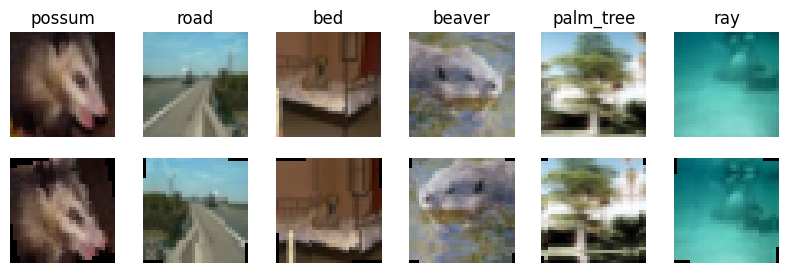

In [1]:
import random

import matplotlib.pyplot as plt
import numpy as np
import torchvision
import torchvision.transforms as transforms

from utils import PATH_DATASETS

NUM_TRAIN = 50000


CIFAR100_TRAIN_MEAN = (0.5070751592371323, 0.48654887331495095, 0.4409178433670343)
CIFAR100_TRAIN_STD = (0.2673342858792401, 0.2564384629170883, 0.27615047132568404)

dataset_train = torchvision.datasets.CIFAR100(PATH_DATASETS, train=True, download=True)
trans = transforms.Compose([
    # transforms.RandomAdjustSharpness(sharpness_factor=2),
    # transforms.ColorJitter(brightness=.6, hue=.05),
    transforms.RandomCrop(32, padding=4, padding_mode='reflect'),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),

    # T.Pad(padding=1),
    # transforms.ToTensor(),
    # transforms.Normalize(CIFAR100_TRAIN_MEAN, CIFAR100_TRAIN_STD)
])

i = random.randint(0, NUM_TRAIN)
o_img, label = dataset_train[i][0], dataset_train.classes[dataset_train[i][1]]
fig, axes = plt.subplots(2, 6, figsize=(10, 3))

for j in range(6):
    i = random.randint(0, NUM_TRAIN)
    axes[0][j].axis('off')
    axes[1][j].axis('off')
    axes[0][j].imshow(dataset_train[i][0])
    axes[0][j].set_title(dataset_train.classes[dataset_train[i][1]])
    axes[1][j].imshow(trans(dataset_train[i][0]))

plt.show()

Files already downloaded and verified


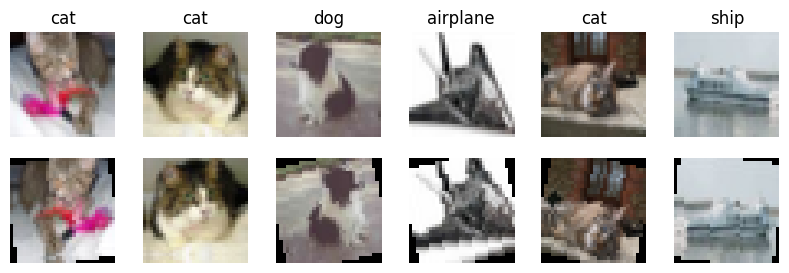

In [2]:
CIFAR10_TRAIN_MEAN = (0.5, 0.5, 0.5)
CIFAR10_TRAIN_STD = (0.5, 0.5, 0.5)
dataset_train10 = torchvision.datasets.CIFAR10(PATH_DATASETS, train=True, download=True)

i = random.randint(0, NUM_TRAIN)
o_img, label = dataset_train10[i][0], dataset_train10.classes[dataset_train10[i][1]]
fig, axes = plt.subplots(2, 6, figsize=(10, 3))

for j in range(6):
    i = random.randint(0, NUM_TRAIN)
    axes[0][j].axis('off')
    axes[1][j].axis('off')
    axes[0][j].imshow(dataset_train10[i][0])
    axes[0][j].set_title(dataset_train10.classes[dataset_train10[i][1]])
    # axes[0][j].set_title(f'{i} ' + dataset_train.classes[dataset_train[i][1]])
    axes[1][j].imshow(trans(dataset_train10[i][0]))

plt.show()

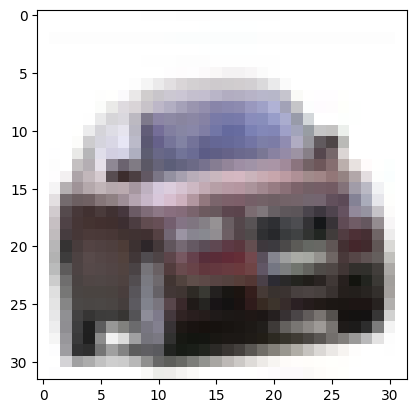

In [3]:
img = transforms.RandomCrop(32, padding=4, padding_mode='reflect')(o_img)
plt.imshow(np.asarray(img))
plt.show()

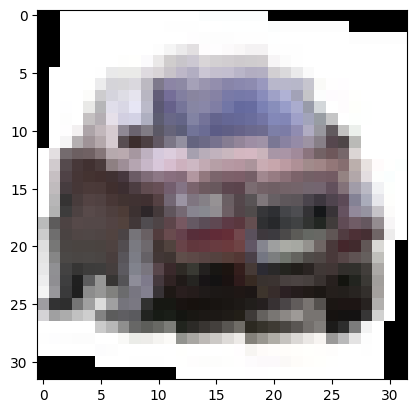

In [4]:

img = transforms.RandomRotation(10)(o_img)
plt.imshow(np.asarray(img))
plt.show()

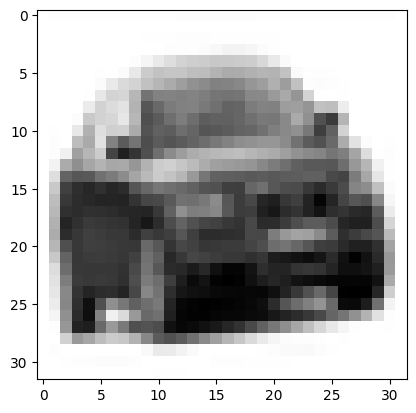

In [5]:
img = transforms.Grayscale()(o_img)
plt.imshow(np.asarray(img), cmap='gray')
plt.show()

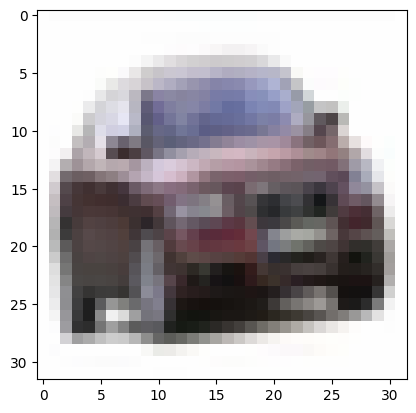

In [6]:

img = transforms.ColorJitter(brightness=.01, hue=.01)(o_img)
plt.imshow(np.asarray(img))
plt.show()

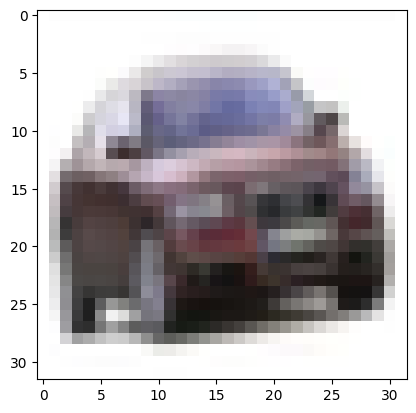

In [7]:
img = transforms.GaussianBlur(kernel_size=(3, 3), sigma=(.1, .1))(o_img)
plt.imshow(np.asarray(img))
plt.show()

<class 'PIL.Image.Image'>


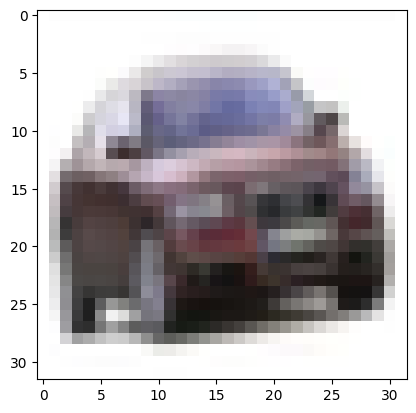

In [8]:

img = transforms.RandomPerspective(distortion_scale=0.2, p=.1)(o_img)
print(type(img))
plt.imshow(np.asarray(img))
plt.show()

<class 'PIL.Image.Image'>


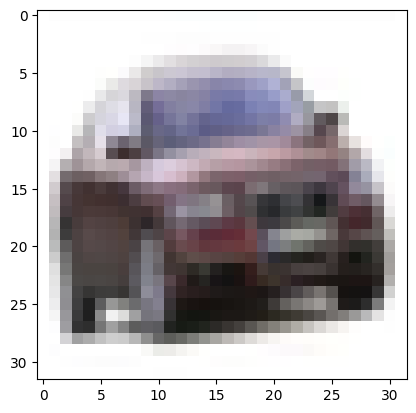

In [9]:
img = transforms.RandomPosterize(bits=8)(o_img)
print(type(img))
plt.imshow(np.asarray(img))
plt.show()

<class 'PIL.Image.Image'>


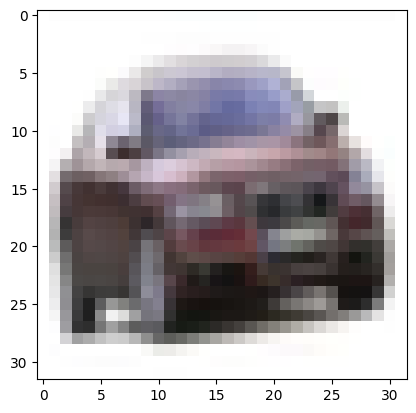

In [10]:
img = transforms.RandomAdjustSharpness(sharpness_factor=1)(o_img)
print(type(img))
plt.imshow(np.asarray(img))
plt.show()

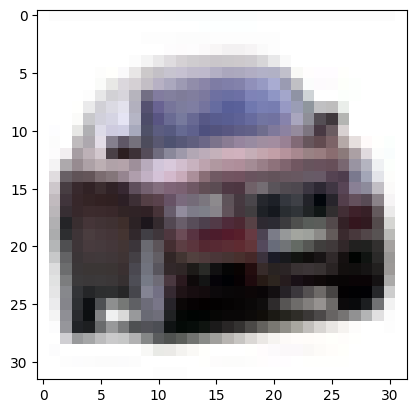

In [11]:

img = transforms.RandomAutocontrast(p=1.)(o_img)
plt.imshow(np.asarray(img))
plt.show()

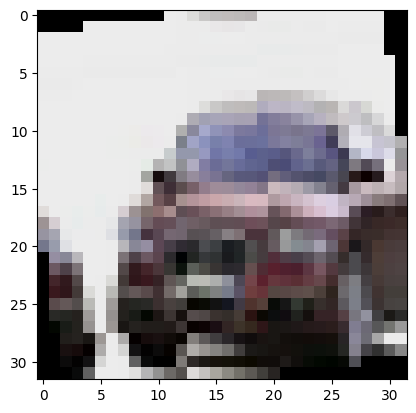

In [12]:
trans = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomAdjustSharpness(sharpness_factor=2),
    transforms.GaussianBlur(kernel_size=(3, 3), sigma=(.1, .1)),
    transforms.ColorJitter(brightness=.3, hue=.02),
    transforms.RandomCrop(32, padding=4, padding_mode='reflect'),
    transforms.RandomPerspective(distortion_scale=0.01, p=1.),
    transforms.RandomRotation(10),
    # T.Pad(padding=1),
    # transforms.ToTensor(),
    # transforms.Normalize(CIFAR100_TRAIN_MEAN, CIFAR100_TRAIN_STD)
])
img = trans(o_img)
plt.imshow(np.asarray(img))
plt.show()